First, we import 'original_titanic.csv' and use 'clean_titanic_data' to clean the it.

In [4]:
from my_utils import clean_titanic_data, age_category, plot_count
df = clean_titanic_data('original_titanic.csv')
df.head(10)

,ID,Survived,Class,Name,Gender,Age,Fare
0,1,0,3,"Braund, Mr. Owen",male,22.000000,7.2500
1,2,1,1,"Cumings, Mrs. John",female,38.000000,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques",female,35.000000,53.1000
4,5,0,3,"Allen, Mr. William",male,35.000000,8.0500
5,6,0,3,"Moran, Mr. James",male,28.111111,8.4583
6,7,0,1,"McCarthy, Mr. Timothy",male,54.000000,51.8625
7,8,0,3,"Palsson, Master. Gosta",male,2.000000,21.0750
8,9,1,3,"Johnson, Mrs. Oscar",female,27.000000,11.1333
9,10,1,2,"Nasser, Mrs. Nicholas",female,14.000000,30.0708


Next, we discuss the relationship between survival status and class/gender.

In [6]:
Survival_by_Gender = df.groupby('Gender')['Survived'].mean()
print(Survival_by_Gender)

Survival_by_Class = df.groupby('Class')['Survived'].mean()
print(Survival_by_Class)

Gender
female    1.0
male      0.0
Name: Survived, dtype: float64
Class
1    0.666667
2    1.000000
3    0.333333
Name: Survived, dtype: float64


We can see from 'Survival_by_Gender' that all female passenger survived the crash while all male passenger did not. 
From 'Survival_by_Class', we can tell that class 2 has the highest survival rate, followed by class 1 then class 3. 
We can explain the situation by the number of passengers in each class/gender.

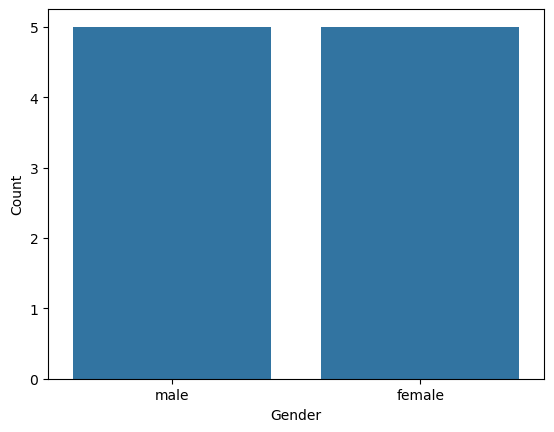

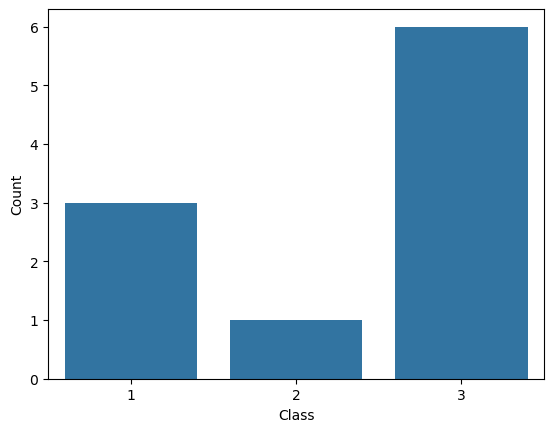

In [8]:
plot_count(df, 'Gender')
plot_count(df, 'Class')

We can see from the chart that the numbers of male and female passengers are equal, we may assume there is some relationship between gender and survival status. 
Meanwhile, from the following reasons, we cannot conclude that there must be a relationship between class and survival status: 
1. Although class 2 has the highest rate of 1, but there was only one passenger.
2. The survival rate of class 1 and class 3 may seem like there is a huge difference, but the number of passengers of these two classes are relatively small.

Next, we disscuss the relationship between AgeGroup and survival status.

AgeGroup
Adult     0.571429
Child     0.500000
Senior    0.000000
Name: Survived, dtype: float64


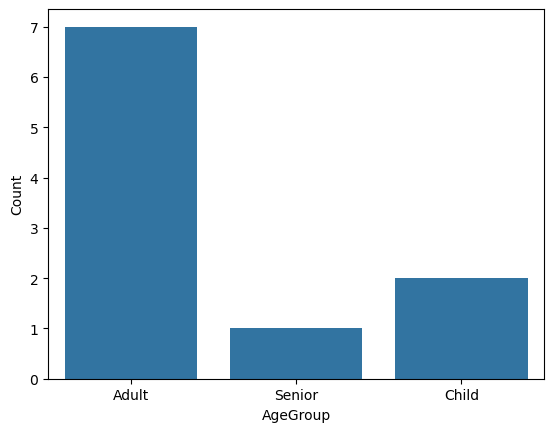

In [14]:
df['AgeGroup'] = df['Age'].apply(age_category)
Survival_by_AgeGroup = df.groupby('AgeGroup')['Survived'].mean()
print(Survival_by_AgeGroup)
plot_count(df, 'AgeGroup')

Still, we cannot tell there must be a relationship between AgeGroup and survival status since the numbers of passengers in differebt AgeGroup are relatively seperated.

Finally, we discuss the relationship between FareTier and survival status.

FareTier
High      0.75
Low       0.25
Medium    0.50
Name: Survived, dtype: float64


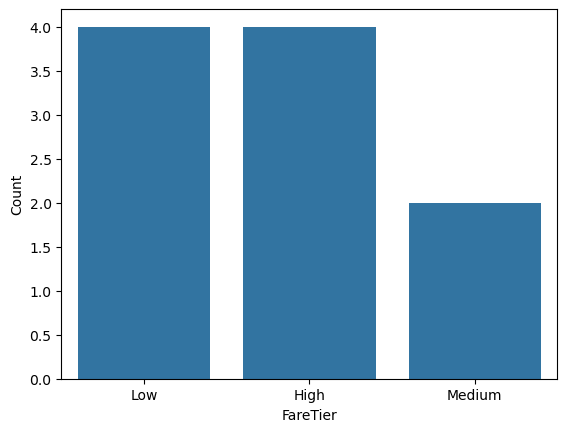

In [18]:
import numpy as np

conditions = [df['Fare'] < 10, (10 <= df['Fare']) & (df['Fare'] < 30), 30 <= df['Fare']]
choices = ['Low', 'Medium', 'High']
df['FareTier'] = np.select(conditions, choices)

Survival_by_FareTier = df.groupby('FareTier')['Survived'].mean()
print(Survival_by_FareTier)
plot_count(df, 'FareTier')

Since the numbers of passengers in different FareTier are relatively close, we may assume that buying a high priced ticket did buy you more survival chance, while low priced ticket lose your chance to survive.

### Conclusion:
- There might not be a significant relatiobship between survival status and Age/Class, since the numbers of passengers are small in this sample.
- We can say there could be relationship between survival status and FareTier. 
- Gender appears to be the strongest factor in survival. All female passengers survived, while all male passengers did not, in this sample.